# Quantum Teleportation

This notebook is based on the Wikipedia article [Quantum teleportation][2] and [Adam Miranowicz, Kiyoshi Tamaki. An Introduction to Quantum Teleportation. 2003.][1].


[1]: https://arxiv.org/abs/quant-ph/0302114
[2]: https://en.wikipedia.org/wiki/Quantum_teleportation

Alice wants to transfer the quantum state of a first qubit $A$,

$$
\vert\psi\rangle=\alpha\vert0\rangle_A+\beta\vert1\rangle_A,
$$

to a second qubit $B$ owned by Bob. The no-cloning theorem forbids that a quantum state can be cloned, therefore, we refer to the transfer of a quantum state as quantum teleportation.

In order to quantum teleport the state $\vert\psi\rangle$ from qubit $A$ owned by Alice to qubit $B$ owned by Bob, we need a third qubit $C$ that is entanbled with qubit $B$.

Two entangled qubits can be represented in the Bell states,

$$
\begin{align}
\vert\Phi^+\rangle
&=\frac{\vert0\rangle\otimes\vert0\rangle+\vert1\rangle\otimes\vert1\rangle}{\sqrt{2}},\\
\vert\Phi^-\rangle
&=\frac{\vert0\rangle\otimes\vert0\rangle-\vert1\rangle\otimes\vert1\rangle}{\sqrt{2}},\\
\vert\Psi^+\rangle
&=\frac{\vert0\rangle\otimes\vert1\rangle+\vert1\rangle\otimes\vert0\rangle}{\sqrt{2}},\\
\vert\Psi^-\rangle
&=\frac{\vert0\rangle\otimes\vert1\rangle-\vert1\rangle\otimes\vert0\rangle}{\sqrt{2}}.
\end{align}
$$

Without loss of generality, we prepare qubits $B$ and $C$ to be in the state $\vert\Psi^+\rangle_{BC}$. The state of the three qubits in total is therefore,

$$
\vert\phi\rangle
=\vert\psi\rangle_A\otimes\vert\Phi^+\rangle_{BC}.
$$

Let us perform a change of basis,

$$
\vert\phi\rangle
=\frac{1}{2}\left[
\vert\Psi^+\rangle_{AC}\otimes(\alpha\vert0\rangle_B+\beta\vert1\rangle_B)
+
\vert\Psi^-\rangle_{AC}\otimes(\alpha\vert0\rangle_B-\beta\vert1\rangle_B)
+
\vert\Phi^+\rangle_{AC}\otimes(\beta\vert0\rangle_B+\alpha\vert1\rangle_B)
+
\vert\Phi^-\rangle_{AC}\otimes(\beta\vert0\rangle_B-\alpha\vert1\rangle_B)
\right].
$$

In the new basis it is more transparent what happens when Alice measures qubits $A$ and $C$ in the Bell states,

$$
\begin{align}
\langle\Psi^+\vert\phi\rangle&=\alpha\vert0\rangle_B+\beta\vert1\rangle_B, \\
\langle\Psi^-\vert\phi\rangle&=\alpha\vert0\rangle_B-\beta\vert1\rangle_B, \\
\langle\Phi^+\vert\phi\rangle&=\beta\vert0\rangle_B+\alpha\vert1\rangle_B, \\
\langle\Phi^-\vert\phi\rangle&=\beta\vert0\rangle_B-\alpha\vert1\rangle_B.
\end{align}
$$

Qubit $B$ has to be in one of these four states. Alice can communicate (classicall) the result of her measurement to Bob. Bob can then apply the correct quantum operation to evolve the state of qubit $B$ into the initial state $\vert\psi\rangle_A$. For example, if Alice finds $\Vert\langle\Psi^+\vert\phi\rangle\Vert^2=1$, Bob does not have to perform any additional quantum operations on $B$, however, if Alice finds $\Vert\langle\Psi^-\vert\phi\rangle\Vert^2=1$, Bob has to apply the Pauli operator $\sigma_z$ to $\langle\Psi^-\vert\phi\rangle$.

We are now going to implement the quantum teleportation algorithm in qiskit.

In [13]:
import numpy as np
import qiskit as qk

backend = qk.BasicAer.get_backend("statevector_simulator")

from qiskit.tools.visualization import plot_state_city

In [22]:
def simulate_quantum_teleportation(alpha, beta):
    cr = qk.ClassicalRegister(2)
    qr = qk.QuantumRegister(3)
    qc = qk.QuantumCircuit(qr)
    
    # set qubit A to initial state |ψ>=⍺|0>+β|1>
    qc.initialize([alpha, beta], qr[0])
    qc.barrier()
    
    # entangle qubits B and C to first Bell state
    qc.h(qr[1])
    qc.cx(qr[1], qr[2])
    qc.barrier()
    
    # measure qubits A and B in the Bell states
    qc.cx(qr[0], qr[1])
    qc.h(qr[0])
    qc.cx(qr[1], qr[2])
    qc.cz(qr[0], qr[2])
    qc.barrier()
    
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    
    # we need some way to access the value of cr to decide
    # what operation we apply to recover the initial state in C
    
    return execute(qc, backend).result().get_statevector()

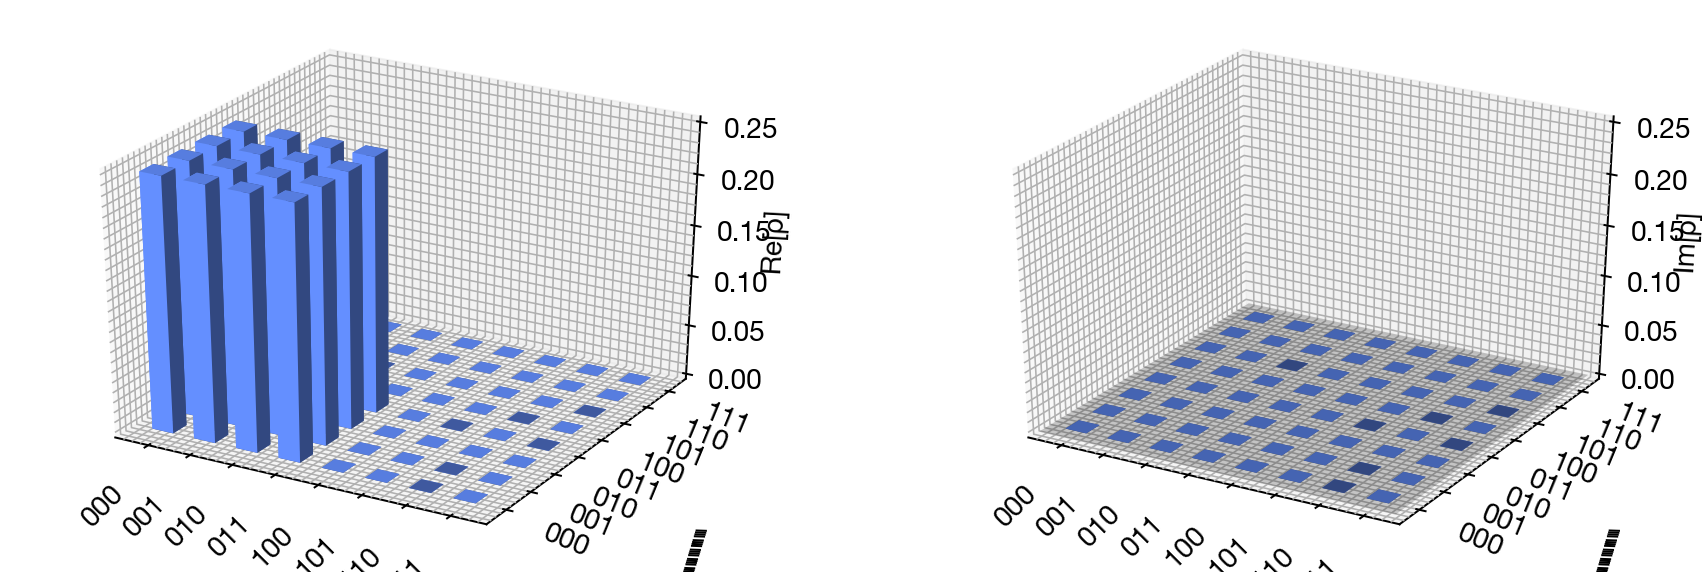

In [23]:
plot_state_city(quantum_teleport(1, 0))

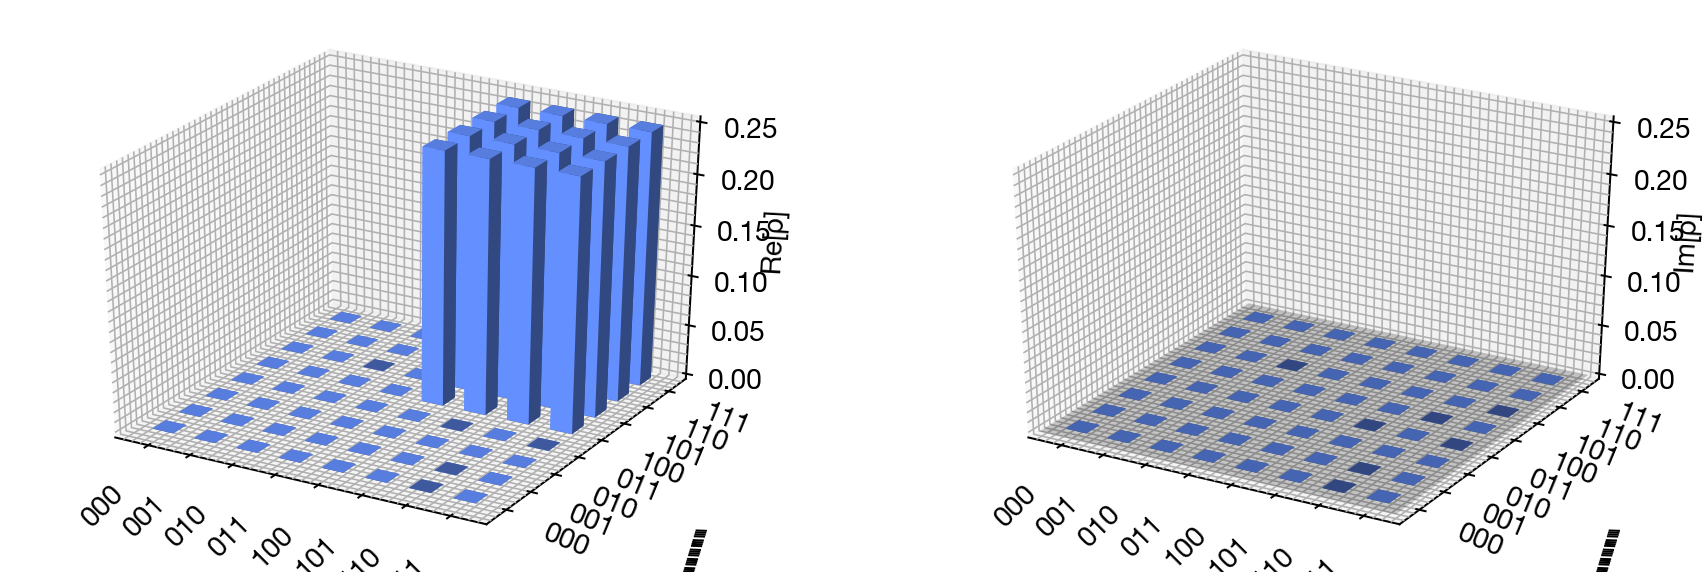

In [24]:
plot_state_city(quantum_teleport(0, 1))

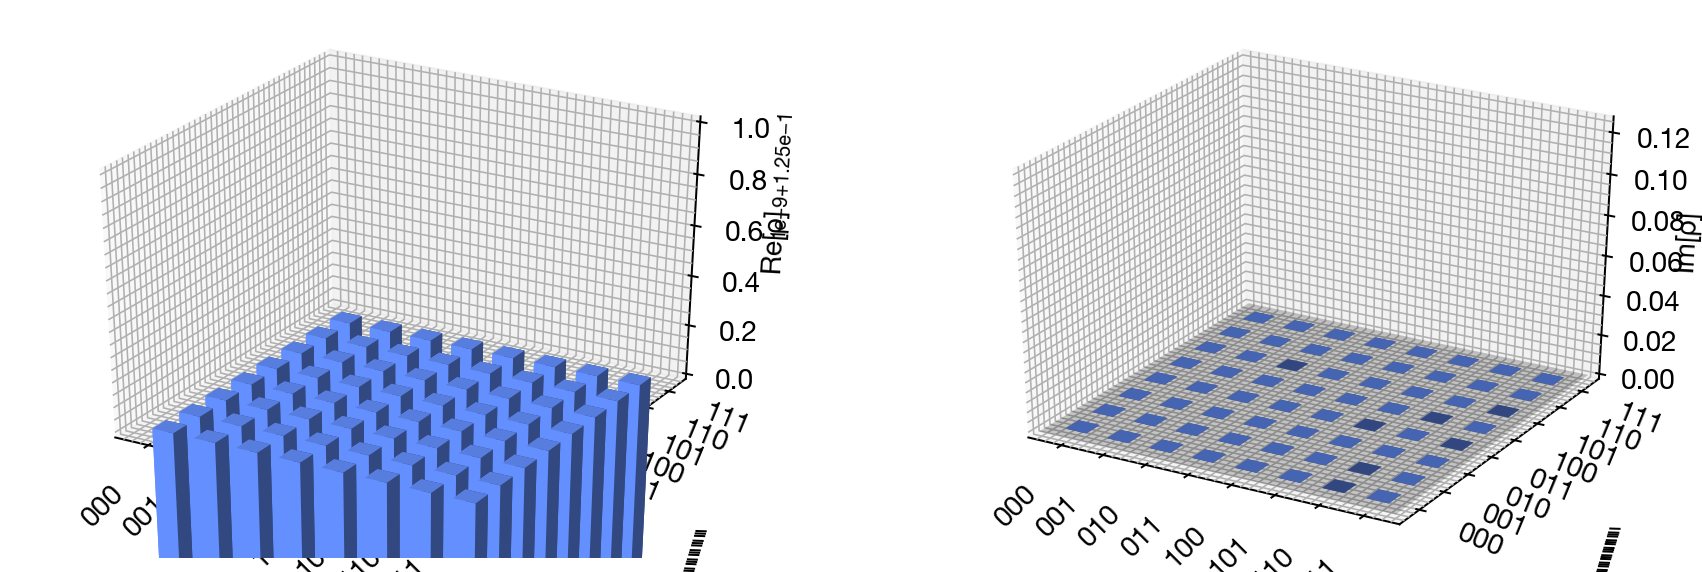

In [26]:
plot_state_city(quantum_teleport(1/np.sqrt(2), 1/np.sqrt(2)))